## Linear regression Notebook

We will solve a linear regression problem by 2 appoaches :
1. Gradient descent: we gradually optimize the weights of the model by its gradient until we reach to a optimal point.
2. Normal Equation: using linear algebra knowledge to calculate the weights.

### Notations:

$\mathbf{X} \in R^{N, D}$: dataset where $N$ is number of data points and $D$ is dimension of each data point.

$\mathbf{y} \in R^{N}$: continous-valued labels.

$\mathbf{w} \in R^{D}$: parameters we need to find.

$\mathbf{\hat{y}} = \mathbf{X}\mathbf{w} \in R^{N}$: predicted function parameterized by $\mathbf{w}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 0. Prepare pseudo-dataset:

I create 2D data points which have linear relationship, and add some noise.

In [3]:
class Dataset:

    def __init__(self, noise=10, degree=1):
        self.noise = noise
        self.degree = degree

    def _transform_space(self, X):
        X_temp = X[:]
        for d in range(2, self.degree + 1):
            X_temp = np.concatenate(((X[:, 0] ** d).reshape(-1, 1), X_temp), axis=1)
        return X_temp
    
    def _prepare_data(self, num_points=100):
        X = np.linspace(-2, 2, num_points)
        X = X.reshape(-1, 1)
        coef = []
        for d in range(self.degree):
            coef.append(np.random.uniform(-20, 40))
        coef.append(np.random.uniform(0, 2))
        coef = np.array(coef)
        X_transform = self._transform_space(X)
        bias = np.ones((X.shape[0], 1))
        X_transform = np.concatenate((X_transform, bias), axis=1)
        y = X_transform.dot(coef).reshape((num_points, 1)) + np.random.uniform(1, self.noise, (num_points, 1))
        return X, X_transform, y

In [4]:
dataset = Dataset()

In [5]:
X, X_transform, y = dataset._prepare_data()

Let's visualize the pseudo-dataset:

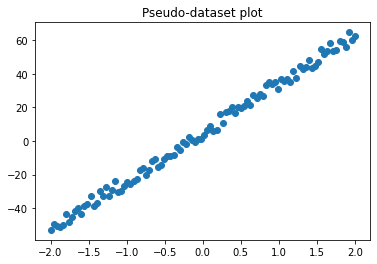

In [15]:
fig = plt.figure(1)
ax = fig.add_subplot()
ax.set_title("Pseudo-dataset plot")
ax.scatter(X, y)

In [ ]:
def do_plot(X, y, y_hat, title, figure_num=1):
    fig = plt.figure(figure_num)
    ax = fig.add_subplot()
    ax.set_title(title)
    ax.scatter(X, y)
    ax.plot(X, y_hat, "r")

### 1. Gradient Descent:

Objective function: $$L(\mathbf{w})= \frac{1}{2N} \sum_{i=1}^N(\mathbf{x_i}\mathbf{w} - \mathbf{y_i})^2$$

Derivation of $L$ w.r.t $\mathbf{w}$: $$\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{N}\mathbf{X}^T(\mathbf{X}\mathbf{w}-\mathbf{y})$$

Gradient descent: $$\mathbf{w} = \mathbf{w} - \alpha \frac{\partial L}{\partial \mathbf{w}}$$
keep looping until $\frac{\partial L}{\partial \mathbf{w}}$ changes very very little or reach maximum iteration.


In [16]:
theta = np.random.normal(size=(X_transform.shape[1], 1))    

In [17]:
y_hat = X_transform.dot(theta)

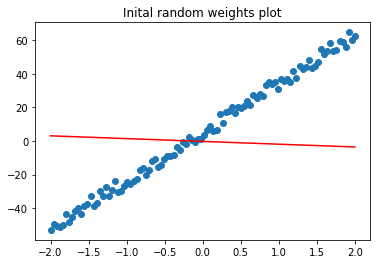

In [19]:
do_plot(X, y, y_hat, "Inital random weights plot")

In [20]:
def gradient(X, y, theta):
    m = X.shape[0]
    return 1/m*np.dot(X.T, np.dot(X, theta) - y)

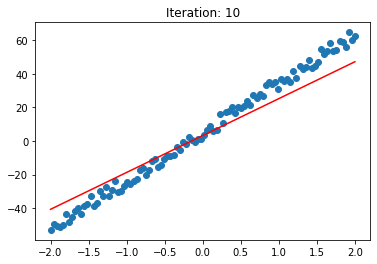

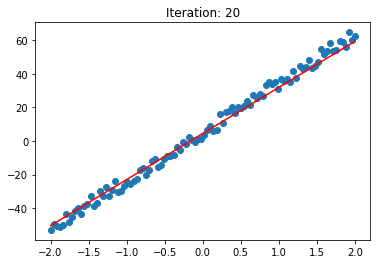

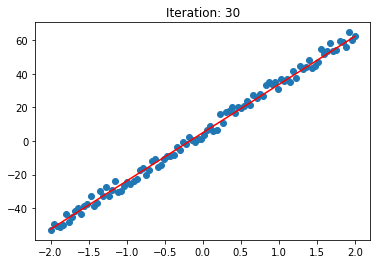

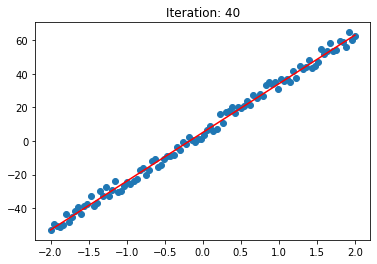

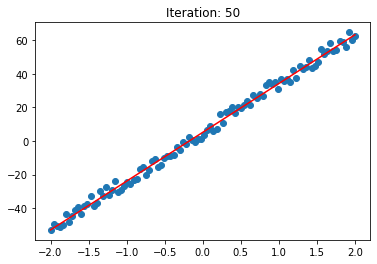

In [21]:
for i in range(50):
    grad = gradient(X_transform, y, theta)
    theta = theta - 0.1*grad
    y_hat = X_transform.dot(theta)
    if (i+1) % 10 == 0:
        do_plot(X, y, y_hat, "Iteration: {}".format(i+1), i//10)

### 2. Normal Equation

We have: $$\textbf{X}\textbf{w} = \textbf{y}$$
If we not careful: $$\underbrace{\textbf{X}^{-1} \textbf{X}}_{I: identity matrix} \textbf{w} = \textbf{X}^{-1} \textbf{y}$$
$$=> \textbf{w} = \textbf{X}^{-1} \textbf{y}$$
will not work because we cannot invert non-square matrix, even though sometimes $X$ can be square but it's not in general case.

So, correct formulation:
$$\textbf{X}^T\textbf{X}\textbf{w} = \textbf{X}^T\textbf{y}$$
$$\underbrace{(\textbf{X}^T\textbf{X})^{-1} (\textbf{X}^T\textbf{X})}_{I: identity matrix}\textbf{w} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$$
$$=> \textbf{w} = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$$

In [10]:
w = np.linalg.inv(np.dot(X_transform.T, X_transform)).dot(X_transform.T).dot(y)

In [13]:
y_hat = np.dot(X_transform, w)

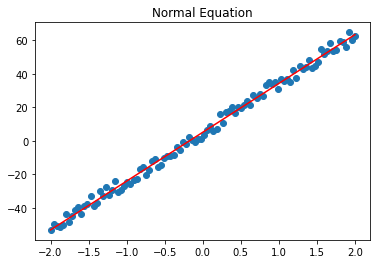

In [14]:
do_plot(X, y, y_hat, title="Normal Equation")

And you see that 2 appoaches have exact solution for this pseudo-dataset. In fact, we rarely use normal equation in practice because of some drawbacks:
- The computation is expensive when dimension of each data point is high.
- Out of memory error can happen because we need a lot of memory to store transform matrix, inverted matrix in one calculation.

### 3. Polynomial Linear Regression:

Even though the data points are in the curve, but the parameters we need to optimize are still linear

In [22]:
dataset = Dataset(degree=2)

In [23]:
X, X_transform, y = dataset._prepare_data()

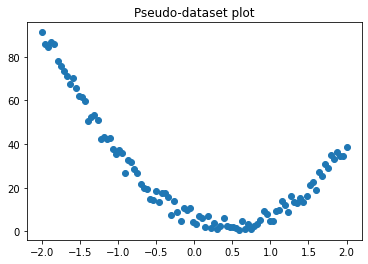

In [24]:
fig = plt.figure(1)
ax = fig.add_subplot()
ax.set_title("Pseudo-dataset plot")
ax.scatter(X, y)

In [25]:
theta = np.random.normal(size=(X_transform.shape[1], 1))
y_hat = np.dot(X_transform, theta)

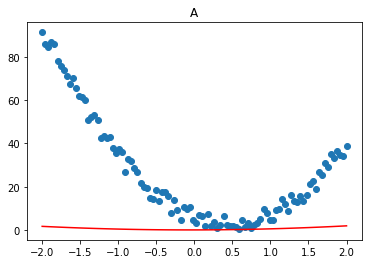

In [26]:
do_plot(X, y, y_hat, "A")

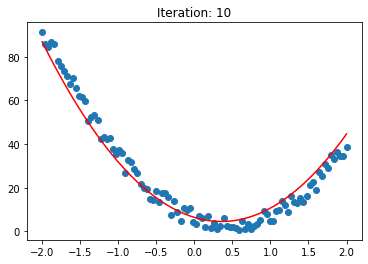

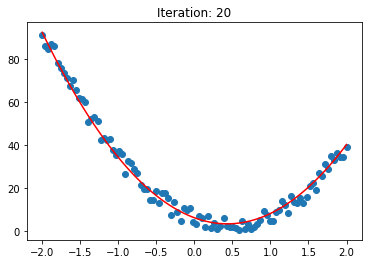

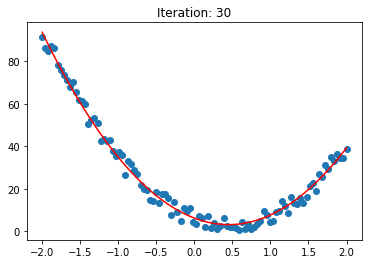

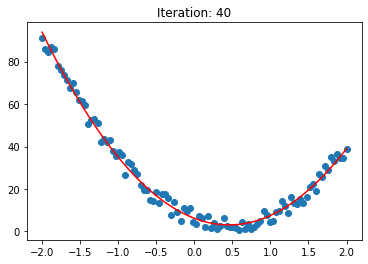

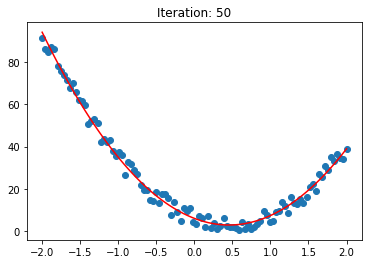

In [27]:
for i in range(50):
    grad = gradient(X_transform, y, theta)
    theta = theta - 0.1*grad
    y_hat = X_transform.dot(theta)
    if (i+1) % 10 == 0:
        do_plot(X, y, y_hat, "Iteration: {}".format(i+1), i//10)

In [28]:
w = np.linalg.inv(np.dot(X_transform.T, X_transform)).dot(X_transform.T).dot(y)

In [29]:
y_hat = np.dot(X_transform, w)

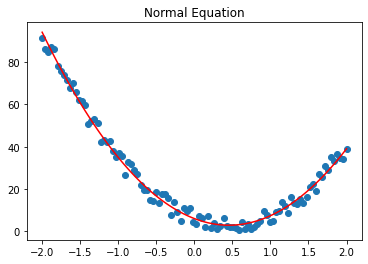

In [30]:
do_plot(X, y, y_hat, title="Normal Equation")

#### You could modifying the code by yourself, and play around with it.